In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import matplotlib

# uncomment below to export as .pgf file

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)            # legend fontsize

3-layer network zono/interval Lipschitz constant difference: 3373.664989496984

4-layer network zono/interval Lipschitz constant difference: 39105.2845808528

5-layer network zono/interval Lipschitz constant difference: 382754.6565426453



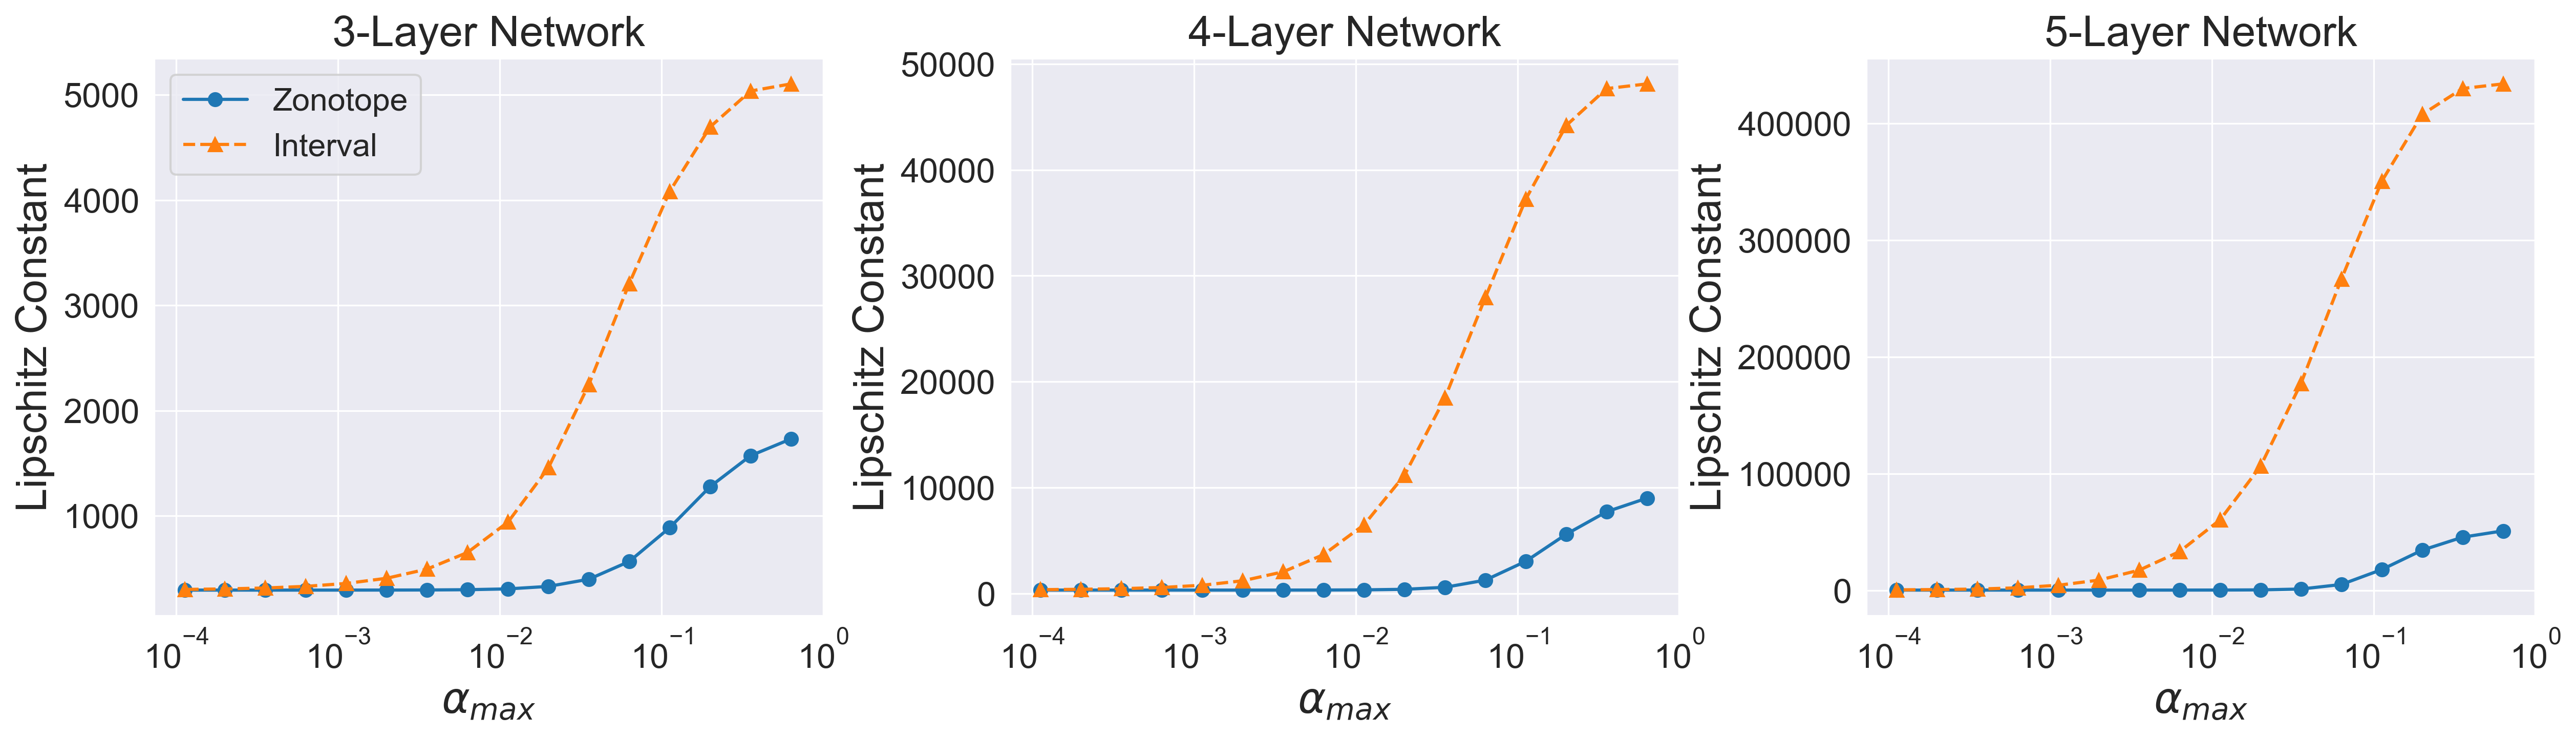

In [3]:
import numpy as np

sns.set_style('darkgrid')

epsilons = [10**(-k/4) * 2 for k in range(2, 18)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8), dpi=300)
plt.subplots_adjust(wspace=0.28)

for i, layers in enumerate([3, 4, 5]):
    lc_zonos = torch.load(f'results/lc_zonos_{layers}layer.pth')
    lc_intervals = torch.load(f'results/lc_intervals_{layers}layer.pth')
    
    print(f'{layers}-layer network zono/interval Lipschitz constant difference:', max(lc_intervals) - max(lc_zonos))
    print()
    
    axs[i].plot(epsilons, lc_zonos, marker='o', label='Zonotope')
    axs[i].plot(epsilons, lc_intervals, linestyle='--', marker='^', label='Interval')
    axs[i].set_xscale('log')
    axs[i].set_xticks([1, 0.1, 0.01, 0.001, 0.0001])
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_ylabel('Lipschitz Constant')
    axs[i].set_title(f'{layers}-Layer Network')
    
    if i == 0:
        axs[i].legend()

plt.show()
# plt.savefig('lipschitz-constant.pgf', bbox_inches='tight')

3-layer network zono/interval relative precision improvement: 5.6580210083611435

4-layer network zono/interval relative precision improvement: 31.275785902888806

5-layer network zono/interval relative precision improvement: 215.89241164488615



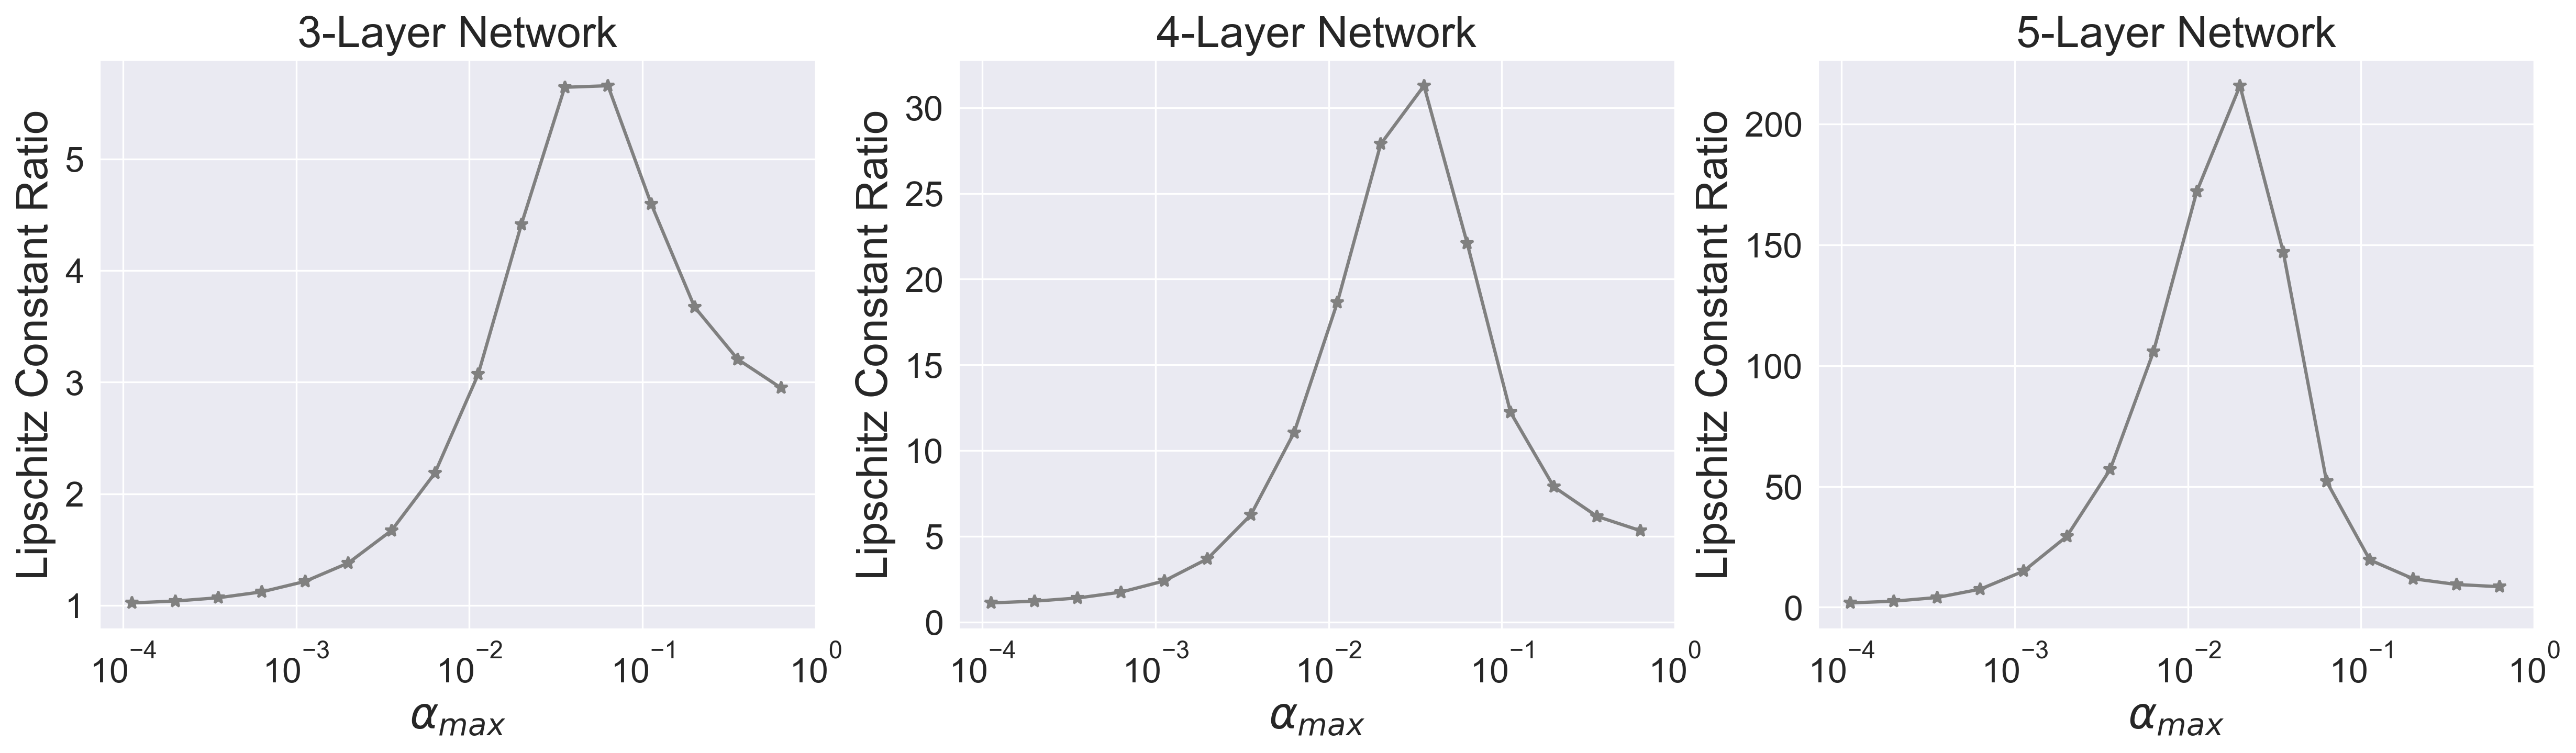

In [4]:
import numpy as np

sns.set_style('darkgrid')

epsilons = [10**(-k/4) * 2 for k in range(2, 18)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8), dpi=300)
# plt.subplots_adjust(wspace=0.28)

for i, layers in enumerate([3, 4, 5]):
    lc_zonos = torch.load(f'results/lc_zonos_{layers}layer.pth')
    lc_intervals = torch.load(f'results/lc_intervals_{layers}layer.pth')
    
    prec = np.array(lc_intervals) / np.array(lc_zonos)
    print(f'{layers}-layer network zono/interval relative precision improvement:', max(prec))
    print()
    
    axs[i].plot(epsilons, prec, marker='*', color='gray')
    axs[i].set_xscale('log')
    axs[i].set_xticks([1, 0.1, 0.01, 0.001, 0.0001])
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_ylabel('Lipschitz Constant Ratio')
    axs[i].set_title(f'{layers}-Layer Network')

plt.show()
# plt.savefig('lipschitz-precision.pgf', bbox_inches='tight')

big network zono/interval Lipschitz constant difference: 467244156.28265846
big network zono/interval relative precision improvement: 11853.982606558186


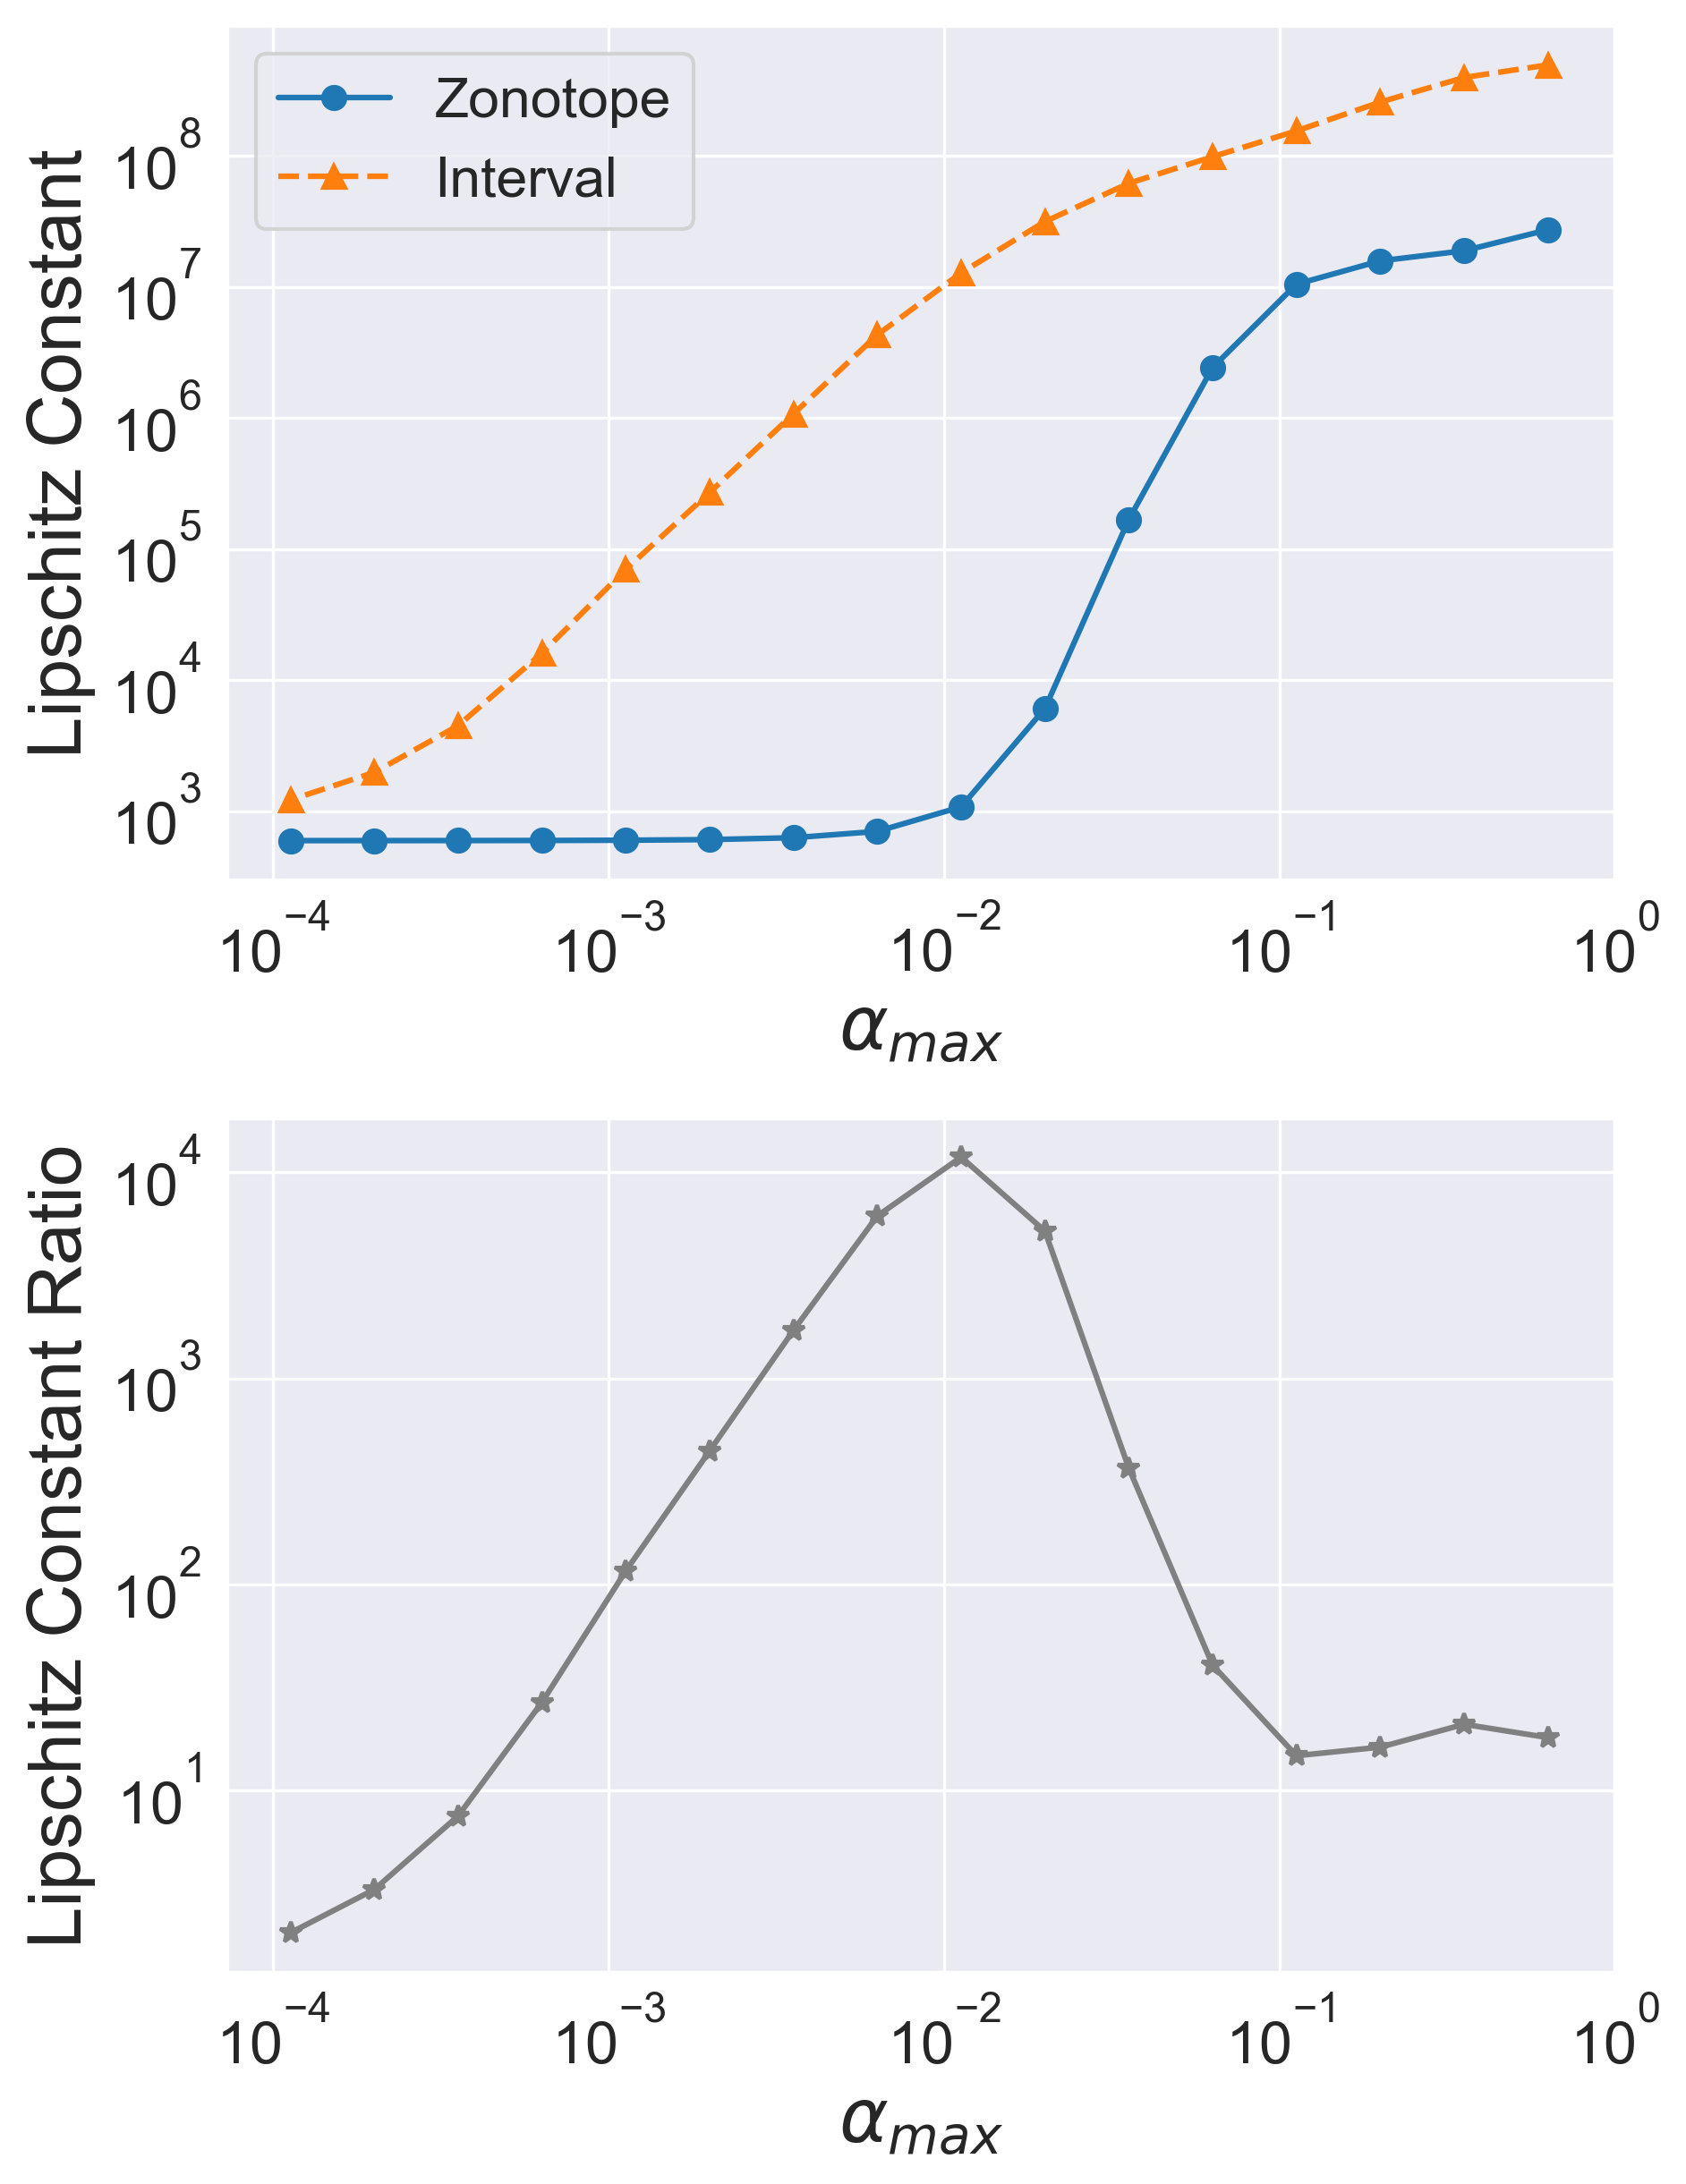

In [5]:
import numpy as np

sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20/3, 4.8*2), dpi=300)
plt.subplots_adjust(hspace=0.28)

epsilons = [10**(-k/4) * 2 for k in range(2, 18)]
layers = 'big'

lc_zonos = torch.load(f'results/lc_zonos_{layers}.pth')
lc_intervals = torch.load(f'results/lc_intervals_{layers}.pth')

print('big network zono/interval Lipschitz constant difference:', max(lc_intervals) - max(lc_zonos))

for i in [0, 1]:
    if i == 0:
        axs[i].plot(epsilons, lc_zonos, marker='o', label='Zonotope')
        axs[i].plot(epsilons, lc_intervals, linestyle='--', marker='^', label='Interval')
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xticks([1, 0.1, 0.01, 0.001, 0.0001])
        axs[i].set_xlabel(r'$\alpha_{max}$')
        axs[i].set_ylabel('Lipschitz Constant')
        axs[i].legend()
    elif i == 1:
        prec = np.array(lc_intervals) / np.array(lc_zonos)
        print(f'big network zono/interval relative precision improvement:', max(prec))
        axs[i].plot(epsilons, prec, marker='*', color='gray')
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xticks([1, 0.1, 0.01, 0.001, 0.0001])
        axs[i].set_xlabel(r'$\alpha_{max}$')
        axs[i].set_ylabel('Lipschitz Constant Ratio')      

plt.show()
# plt.savefig('lipschitz-constant-big.pgf', bbox_inches='tight')